# Домашнее задание

__1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)__

__2. сделать обзорный анализ выбранного датасета__

__3. сделать feature engineering__

__4. обучить любой классификатор (какой вам нравится)__

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\tanbe\\Desktop\\sobar-72.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
1,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
2,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
3,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
4,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
69,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
70,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
71,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [3]:
df.iloc[:,19].nunique(), np.sort(df.iloc[:,19].unique())

(3, array(['0', '1', 'ca_cervix'], dtype=object))

Данный датасет состоит из 18 атрибутов, которые происходят от 8 переменных (имя переменной является первым словом в каждом атрибуте)

1) behavior_eating

2) behavior_personalHygine

3) intention_aggregation

4) intention_commitment

5) attitude_consistency

6) attitude_spontaneity

7) norm_significantPerson

8) norm_fulfillment

9) perception_vulnerability

10) perception_severity

11) motivation_strength

12) motivation_willingness

13) socialSupport_emotionality

14) socialSupport_appreciation

15) socialSupport_instrumental

16) empowerment_knowledge

17) empowerment_abilities

18) empowerment_desires

19) ca_cervix (Бинарный атрибут, 1=есть рак шейки матки, 0=нет)

Целевая переменная: ca_cervix (есть ли рак шейки матки), если есть, то 1, если нет - 0.

In [4]:
df.iloc[:, -1].value_counts()

0            51
1            21
ca_cervix     1
Name: 19, dtype: int64

Нужно убрать названия столбцов из первой строки.

In [5]:
df.drop(labels = [0],axis = 0, inplace = True)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


Соотношение классов

In [6]:
df.iloc[:, -1].value_counts()

0    51
1    21
Name: 19, dtype: int64

In [7]:
def get_num_features(df):
    """
    функция возвращает список числовых признаков
    :param df
    :return: list
    """
    numerical_features = df.select_dtypes(include=[np.number])
    # print(f"count of numeric_features_train {numerical_features.shape[1]}")
    return numerical_features.columns


def get_cat_features(df):
    """
    функция возвращает список признаков с типом "объект"
    :param df:
    :return: list
    """
    categorical_features = df.select_dtypes(include=[np.object])
    return categorical_features.columns

Числовые признаки

In [8]:
get_num_features(df)

Int64Index([], dtype='int64')

In [9]:
get_cat_features(df)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [10]:
df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19]].dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

Необходимо преобразовать эти признаки в числовые.

In [11]:
df = df.astype(int)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [12]:
get_num_features(df)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [13]:
get_cat_features(df)

Int64Index([], dtype='int64')

Разбиваем выборку на тренировочную и тестовую части и обучаем модель 

In [14]:
from sklearn.model_selection import train_test_split

x_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=7)

In [15]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

Learning rate set to 0.003032
0:	learn: 0.6902047	total: 154ms	remaining: 2m 33s
1:	learn: 0.6870785	total: 155ms	remaining: 1m 17s
2:	learn: 0.6843140	total: 155ms	remaining: 51.6s
3:	learn: 0.6817123	total: 156ms	remaining: 38.9s
4:	learn: 0.6791557	total: 157ms	remaining: 31.3s
5:	learn: 0.6761639	total: 158ms	remaining: 26.2s
6:	learn: 0.6734370	total: 159ms	remaining: 22.5s
7:	learn: 0.6699592	total: 159ms	remaining: 19.8s
8:	learn: 0.6677529	total: 160ms	remaining: 17.6s
9:	learn: 0.6655052	total: 161ms	remaining: 15.9s
10:	learn: 0.6633699	total: 162ms	remaining: 14.5s
11:	learn: 0.6609482	total: 163ms	remaining: 13.4s
12:	learn: 0.6579932	total: 164ms	remaining: 12.5s
13:	learn: 0.6553738	total: 165ms	remaining: 11.6s
14:	learn: 0.6532526	total: 166ms	remaining: 10.9s
15:	learn: 0.6502029	total: 167ms	remaining: 10.2s
16:	learn: 0.6479571	total: 167ms	remaining: 9.68s
17:	learn: 0.6451967	total: 168ms	remaining: 9.17s
18:	learn: 0.6426488	total: 169ms	remaining: 8.72s
19:	learn

Проверяем качество

In [17]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
    return f1, roc, rec, prc
    
f1, roc, rec, prc = evaluate_results(y_test, y_predict)

Classification results:
f1: 80.00%
roc: 85.00%
recall: 80.00%
precision: 80.00%


__5. разобраться с SHAP и построить важности признаков для:__
    
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для топ 10%
    
__6. для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат__

Text(0.5, 1.0, 'Топ 10 важных признаков')

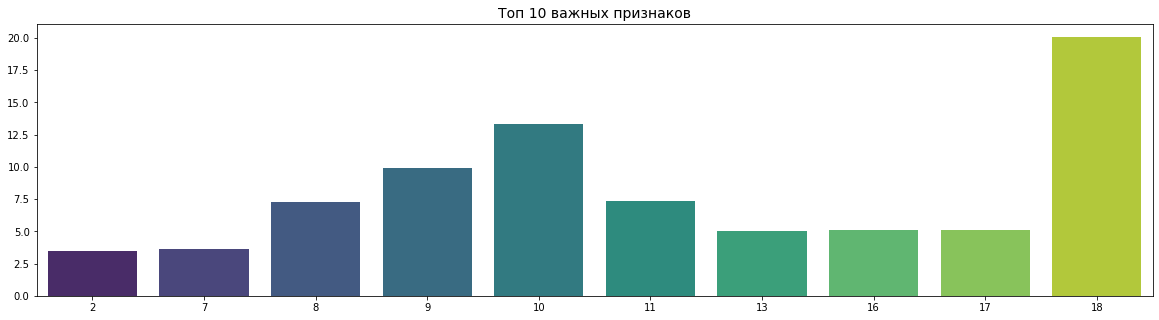

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

n_top = 10
importances = model.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = df.drop([19], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("Топ 10 важных признаков", size=14)

In [24]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [26]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

Заболеть раком матки гораздо вероятнее, если у женщины средний уровень желания расширения прав и возможностей.
Также вероятность повышается, если женщина довольно часто меняет половых партнеров.

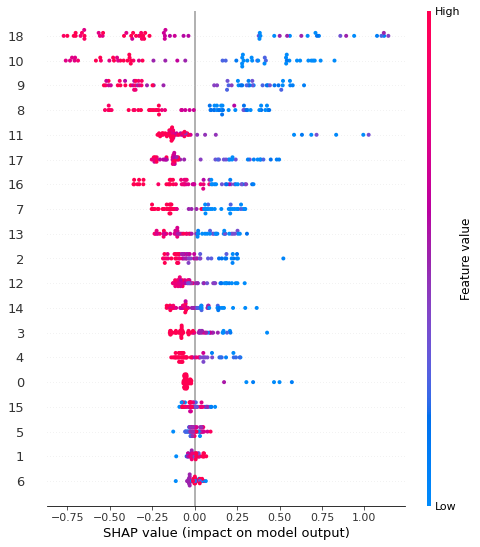

In [30]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

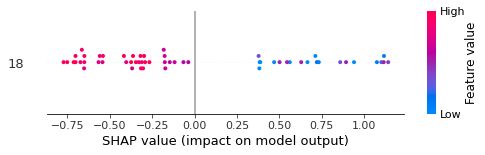

In [31]:
top10perc = round(x_train.shape[1]**0.1)
shap.summary_plot(shap_values, x_train, max_display=top10perc)

Чем ниже желание женщины расширить свои права и возможности - тем более вероятнет у неё рак матки.

Если женщина мотивированная, сильная - вероятность рака матки уменьшается.

Правильное питание также снижает риск разития рака.

В целом можно сделать следующий вывод: если женщина следит за здоровьем, нечасто меняет половых партнеров, развивается умственно, эмоционально и физически - риск возникновения рака матки гораздо меньше.